In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/gamzebilsen/Documents/columbia/da/ind project/final.csv')

In [3]:
df.head()

,field_1,RegionID,SizeRank,RegionName,lat,log,RegionType,StateName,1/31/2000,2/29/2000,...,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,disastercount_Count of disasterno
0,0,394913,1,"New York, NY",40.682950,-73.970800,Msa,NY,224341.0,225681.0,...,G4020,408.0,35620.0,35614.0,C,179684485,71158757,40.635045,-73.950640,113.0
1,1,753899,2,"Los Angeles-Long Beach-Anaheim, CA",33.824150,-117.897707,Msa,CA,231193.0,231998.0,...,G4020,348.0,31080.0,11244.0,A,2053449483,406294114,33.675687,-117.777207,NaN
2,2,394463,3,"Chicago, IL",41.878970,-87.660630,Msa,IL,170104.0,170505.0,...,G4020,176.0,16980.0,16984.0,A,2447350649,1786331385,41.894294,-87.645455,19.0
3,3,394514,4,"Dallas-Fort Worth, TX",32.707900,-96.920900,Msa,TX,130035.0,130139.0,...,G4020,206.0,19100.0,19124.0,A,2261201323,91898226,32.766987,-96.778424,36.0
4,4,394974,5,"Philadelphia, PA",39.990821,-75.168428,Msa,PA,129808.0,130243.0,...,G4020,428.0,37980.0,37964.0,C,347981634,21606282,40.009375,-75.133346,154.0


In [4]:
df['disastercount_Count of disasterno'] = df['disastercount_Count of disasterno'].fillna(0)

In [5]:
ren = pd.read_csv('/Users/gamzebilsen/Documents/columbia/da/ind project/renewablespergeoid.csv')
ren.generation_gwh_2019=ren.generation_gwh_2019.fillna(0)
ren = ren.groupby('GEOID').sum().reset_index()

In [6]:
tomerge=pd.read_csv('/Users/gamzebilsen/Documents/columbia/da/ind project/tomerge.csv')

In [7]:
d = df.merge(ren,on='GEOID',how='left')
d.generation2019 = d.generation_gwh_2019
d.number_disasters=d['disastercount_Count of disasterno']
d.number_disasters
d.percent_dif=((d['10/31/2021']-d['10/31/2011'])/d['10/31/2011']*100).dropna()
d.avgnovtemp = (d['temperatureK11.21']+d['temperatureK11.26.1pm'])/2-273.15
d = d.merge(tomerge,on='GEOID',how='left')
# d.columns.values.tolist()
d.generation2019 = d.generation_gwh_2019
d.number_disasters=d['disastercount_Count of disasterno']
d.number_disasters
d.percent_dif=((d['10/31/2021']-d['10/31/2011'])/d['10/31/2011']*100).dropna()
d.avgnovtemp = (d['temperatureK11.21']+d['temperatureK11.26.1pm'])/2-273.15
d['meanhouseholdincome2019'] = d['county_c75'].fillna(0)
d['percapitaincomeincome2019'] = d['county_c84'].fillna(0)
d['poverty2019'] = d['county_c87'].fillna(0)
d['popdensity'] = d['popdensi12'].fillna(d['popdensi12'].median())
# d.columns.values.tolist()

In [8]:
d['fed_spending_2009']=d['fed_spending_2009'].fillna(0)
d['area_2010']=d['area_2010'].fillna(0)
d['smoking_ban_2010']=d['smoking_ban_2010'].fillna('none')
d['fed_spending_2009']=d['fed_spending_2009'].astype(int)
d['fed_spending_2009']=d['fed_spending_2009'].replace(0,d['fed_spending_2009'].median())
d['area_2010']=d['area_2010'].astype(int)
d['area_2010']=d['area_2010'].replace(0,d['fed_spending_2009'].median())
d['fed_spend_per_area_09'] = d['fed_spending_2009']/d['area_2010']

In [9]:
d['smoking_ban_2010'].value_counts()
conditions = [
    (d['smoking_ban_2010']=='none'),
    (d['smoking_ban_2010']=='comprehensive'),
    (d['smoking_ban_2010']=='partial'),
]
choices = [0,1,1]
d['smoking_ban_2010'] = np.select(conditions,choices, default=np.nan)

In [10]:
air = ['NH3','NO','NO2','O3','PM10','SO2']
airsub=d[air].dropna(how="any")
temperature = ['temperatureK','temperatureK11.21','temperatureK11.26.1pm']
airtemp=d[temperature].dropna(how="any")
def cronbach_alpha(items):
    items = pd.DataFrame(items)
    items_count = items.shape[1]
    variance_sum = float(items.var(axis=0, ddof=1).sum())
    total_var = float(items.sum(axis=1).var(ddof=1))
    
    return (items_count / float(items_count - 1) *
            (1 - variance_sum / total_var))
cronbach_alpha(airsub)
# cronbach_alpha(airtemp)
# airsub.corr(method='pearson')
d['number_disasters']=d.number_disasters
d['percent_dif']=d.percent_dif
d['avgnovtemp']=d.avgnovtemp
d['percapitaincome2019']=d['percapitaincomeincome2019']
d.generation2019 = d.generation2019.fillna(d.generation2019.median)
d['loggeneration2019'] = np.log(d.generation2019+1)
d['loggeneration2019'] = d['loggeneration2019'].fillna(0)
d['loggeneration2019']=d['loggeneration2019'].astype(float)
d['loggeneration2019']=d['loggeneration2019'].replace(0,d['loggeneration2019'].mean())
d['logpercent_dif'] = np.log(d.percent_dif)
d['logfed_spend_per_area_09'] = np.log(d['fed_spend_per_area_09'])
d['logfed_spending_2009'] = np.log(d['fed_spending_2009'])

In [11]:
d.head()

,field_1_x,RegionID,SizeRank,RegionName,lat,log,RegionType,StateName,1/31/2000,2/29/2000,...,popdensity,fed_spend_per_area_09,number_disasters,percent_dif,avgnovtemp,percapitaincome2019,loggeneration2019,logpercent_dif,logfed_spend_per_area_09,logfed_spending_2009
0,0,394913,1,"New York, NY",40.682950,-73.970800,Msa,NY,224341.0,225681.0,...,2600747.0,618.893793,113.0,48.523483,9.222292,34173.0,2.846063,3.882048,6.427934,13.014105
1,1,753899,2,"Los Angeles-Long Beach-Anaheim, CA",33.824150,-117.897707,Msa,CA,231193.0,231998.0,...,3164182.0,424.114114,0.0,114.555242,21.313125,41514.0,4.831030,4.741057,6.050003,11.858145
2,2,394463,3,"Chicago, IL",41.878970,-87.660630,Msa,IL,170104.0,170505.0,...,5223719.0,484.552301,19.0,53.441280,-2.059167,37552.0,2.714099,3.978583,6.183225,12.352836
3,3,394514,4,"Dallas-Fort Worth, TX",32.707900,-96.920900,Msa,TX,130035.0,130139.0,...,2586552.0,109.056650,36.0,129.216042,9.998125,32653.0,2.846063,4.861486,4.691867,11.391368
4,4,394974,5,"Philadelphia, PA",39.990821,-75.168428,Msa,PA,129808.0,130243.0,...,1575522.0,19.165271,154.0,46.517340,8.522917,27924.0,3.649047,3.839825,2.953100,11.998212


In [12]:
d = d[['percent_dif','logpercent_dif','number_disasters','avgnovtemp','loggeneration2019','PM10','percapitaincome2019','popdensity','smoking_ban_2010','fed_spending_2009','area_2010','unemployment_rate_2011','RegionName']]
d = d.dropna(subset=['percent_dif'])
desc=d.describe()
corr = d.corr()
# !pip3 install dataframe_image
# import dataframe_image as dfi
# dfi.export(desc,"desc.png")
d['loggeneration2019'].dtype


dtype('float64')

In [13]:
d[d['number_disasters']==0].sort_values('loggeneration2019',ascending=False).sort_values('percapitaincome2019',ascending=False)[5:15]



,percent_dif,logpercent_dif,number_disasters,avgnovtemp,loggeneration2019,PM10,percapitaincome2019,popdensity,smoking_ban_2010,fed_spending_2009,area_2010,unemployment_rate_2011,RegionName
217,36.548532,3.598641,0.0,5.053958,4.583211,0.56,44480.0,183031.0,1.0,252354,424,9.57,"Torrington, CT"
565,114.238101,4.738285,0.0,-2.907292,2.846063,3.66,44391.0,54357.0,0.0,143534,443,7.28,"Edwards, CO"
852,86.681793,4.462244,0.0,1.549583,6.378113,2.25,44235.0,34061.0,1.0,344876,711,5.65,"Williston, ND"
20,145.502659,4.980194,0.0,8.898958,3.285749,14.23,43770.0,693417.0,1.0,300447,869,9.89,"Denver, CO"
840,112.833514,4.725913,0.0,-0.629792,2.846063,5.53,43769.0,24874.0,0.0,104720,1656,6.26,"Steamboat Springs, CO"
104,120.501285,4.791660,0.0,10.203958,3.312220,16.17,42178.0,501317.0,0.0,238560,680,13.29,"Santa Rosa, CA"
1,114.555242,4.741057,0.0,21.313125,4.831030,75.09,41514.0,3164182.0,0.0,141230,333,11.63,"Los Angeles-Long Beach-Anaheim, CA"
168,124.228339,4.822121,0.0,15.074583,2.846063,32.20,41312.0,273765.0,0.0,121958,599,7.69,"Santa Cruz, CA"
807,133.812542,4.896440,0.0,-0.268333,4.400775,2.78,41281.0,30429.0,0.0,67384,439,9.72,"Breckenridge, CO"
43,29.310193,3.377935,0.0,7.829167,4.070299,0.84,40540.0,894730.0,1.0,158366,925,9.19,"Hartford, CT"


In [18]:
d[d['popdensity']>500000].sort_values('number_disasters',ascending=False)[0:10]

d.describe()
a = d.loc[:,d.columns!='logpercent_dif']
desc=a.describe()
import dataframe_image as dfi
dfi.export(desc,"desc.png")

[1220/133257.712108:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/2g/x52yhs_s6h96x64ydv7ck14m0000gn/T/: Operation not permitted (1)
[1220/133257.714985:ERROR:file_io.cc(94)] ReadExactly: expected 8, observed 0
[1220/133257.718430:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/2g/x52yhs_s6h96x64ydv7ck14m0000gn/T/: Operation not permitted (1)
[1220/133259.282375:INFO:headless_shell.cc(653)] Written to file /var/folders/2g/x52yhs_s6h96x64ydv7ck14m0000gn/T/tmppvv0p4hp/temp.png.
[1220/133259.499130:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/2g/x52yhs_s6h96x64ydv7ck14m0000gn/T/: Operation not permitted (1)
[1220/133259.500571:ERROR:file_io.cc(94)] ReadExactly: expected 8, observed 0
[1220/133259.503572:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/2g/x52yhs_s6h96x64ydv7ck14m0000gn/T/: Operation not permit

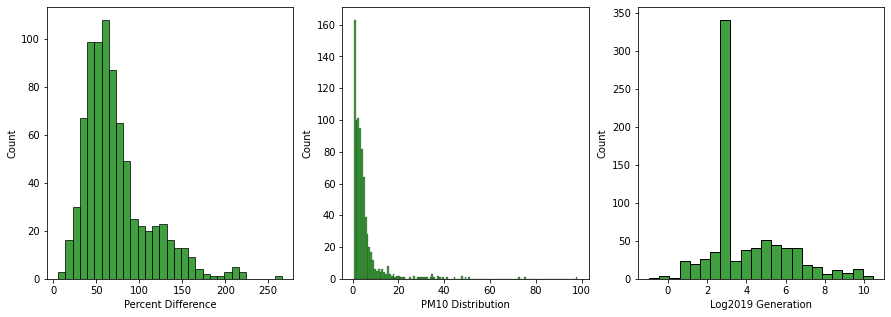

In [703]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
a = sns.histplot(d.percent_dif,ax=axes[0],color='green').set(xlabel='Percent Difference')
b = sns.histplot(d.PM10,ax=axes[1],color='green').set(xlabel='PM10 Distribution')
c = sns.histplot(d.loggeneration2019,ax=axes[2],color='green').set(xlabel='Log2019 Generation')


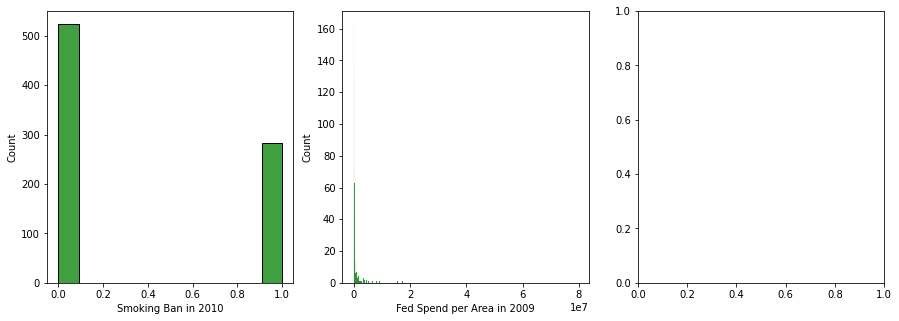

In [704]:

fig, axes = plt.subplots(1,3,figsize=(15,5))
a = sns.histplot(d['smoking_ban_2010'],ax=axes[0],color='green').set(xlabel='Smoking Ban in 2010')
b = sns.histplot(d['fed_spending_2009'],ax=axes[1],color='green').set(xlabel='Fed Spend per Area in 2009')
# c = sns.histplot(d['logfed_spending_2009'],ax=axes[2],color='green').set(xlabel='Log Fed Spend per Area in 2009')


In [705]:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt

In [706]:
lm = smf.ols(formula = 'percent_dif~number_disasters+loggeneration2019+avgnovtemp+percapitaincome2019+PM10+popdensity+fed_spending_2009+smoking_ban_2010', data = d).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:            percent_dif   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     37.84
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           4.33e-51
Time:                        15:52:03   Log-Likelihood:                -3949.4
No. Observations:                 806   AIC:                             7917.
Df Residuals:                     797   BIC:                             7959.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              41.5648    

[Text(0.5, 0, 'Fitted'), Text(0, 0.5, 'Residuals')]

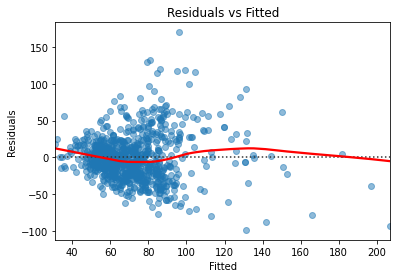

In [708]:

fig, ax = plt.subplots(1, 1)
sns.residplot(lm.predict(), d['percent_dif'], lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted', ylabel='Residuals')


In [710]:
datam=d.loc[:,d.columns!='logpercent_dif']
datam=datam.loc[:,datam.columns!='percent_dif']
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(datam.to_numpy(), i) for i in range(datam.to_numpy().shape[1])]
vif = vif.T
dfi.export(vif,"vif.png")
vif

In [711]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['Langrange multiplier statistic', 'p-value','f-value','f p-value']
test = sms.het_breuschpagan(lm.resid,lm.model.exog)

lzip(name,test)
p= pd.DataFrame(lzip(name,test))
dfi.export(p,"hetero.png")

[1214/155248.596412:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/2g/x52yhs_s6h96x64ydv7ck14m0000gn/T/: Operation not permitted (1)
[1214/155248.600700:ERROR:file_io.cc(94)] ReadExactly: expected 8, observed 0
[1214/155248.603770:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/2g/x52yhs_s6h96x64ydv7ck14m0000gn/T/: Operation not permitted (1)
[1214/155250.227330:INFO:headless_shell.cc(653)] Written to file /var/folders/2g/x52yhs_s6h96x64ydv7ck14m0000gn/T/tmpy_aeqlju/temp.png.


,0,1
0,Langrange multiplier statistic,9.453346e+01
1,p-value,5.567747e-17
2,f-value,1.323730e+01
3,f p-value,4.690474e-18


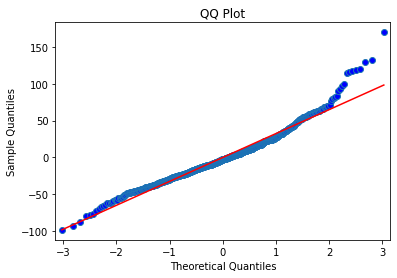

In [712]:

fig, ax = plt.subplots(1, 1)
sm.ProbPlot(lm.resid).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')
# dfi.export(p,"hetero.png")

<AxesSubplot:ylabel='Count'>

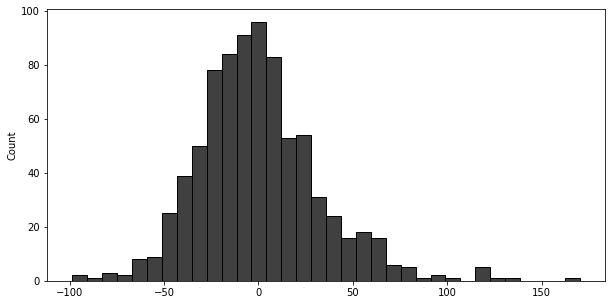

In [714]:
fig, axes = plt.subplots(figsize=(10,5))
sns.histplot(lm.resid,color='black')

In [717]:
def reset_ramsey(res, degree=5):
    order = degree + 1
    k_vars = res.model.exog.shape[1]
    # vander without constant and x, and drop constant
    norm_values = np.asarray(res.fittedvalues)
    norm_values = norm_values / np.sqrt((norm_values ** 2).mean())
    y_fitted_vander = np.vander(norm_values, order)[:, :-2]
    exog = np.column_stack((res.model.exog, y_fitted_vander))
    exog /= np.sqrt((exog ** 2).mean(0))
    endog = res.model.endog / (res.model.endog ** 2).mean()
    res_aux = OLS(endog, exog).fit()
    # r_matrix = np.eye(degree, exog.shape[1], k_vars)
    r_matrix = np.eye(degree - 1, exog.shape[1], k_vars)
    # df1 = degree - 1
    # df2 = exog.shape[0] - degree - res.df_model  (without constant)
    return res_aux.f_test(r_matrix)  # , r_matrix, res_a

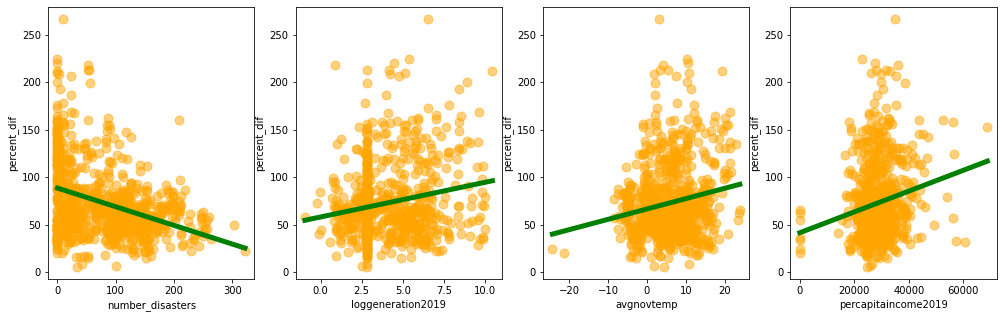

In [718]:
fig, axes = plt.subplots(1,4,figsize=(17,5))
a = sns.regplot(y='percent_dif', x="number_disasters", data=d, ci=None, 
               scatter_kws={"s": 80,'alpha':0.5,'color':'orange'},
               line_kws={'color': 'green','linewidth':5},ax=axes[0]).set(
                xlabel='number_disasters', ylabel = "percent_dif")

b = sns.regplot(y='percent_dif', x="loggeneration2019", data=d, ci=None, 
               scatter_kws={"s": 80,'alpha':0.5,'color':'orange'},
               line_kws={'color': 'green','linewidth':5},ax=axes[1]).set(
                xlabel='loggeneration2019', ylabel = "percent_dif")

c = sns.regplot(y='percent_dif', x="avgnovtemp", data=d,  ci=None, 
               scatter_kws={"s": 80,'alpha':0.5,'color':'orange'},
               line_kws={'color': 'green','linewidth':5},ax=axes[2]).set(
                xlabel='avgnovtemp', ylabel = "percent_dif")

e = sns.regplot(y='percent_dif', x="percapitaincome2019", data=d, ci=None, 
               scatter_kws={"s": 80,'alpha':0.5,'color':'orange'},
               line_kws={'color': 'green','linewidth':5},ax=axes[3]).set(
                xlabel='percapitaincome2019', ylabel = "percent_dif")


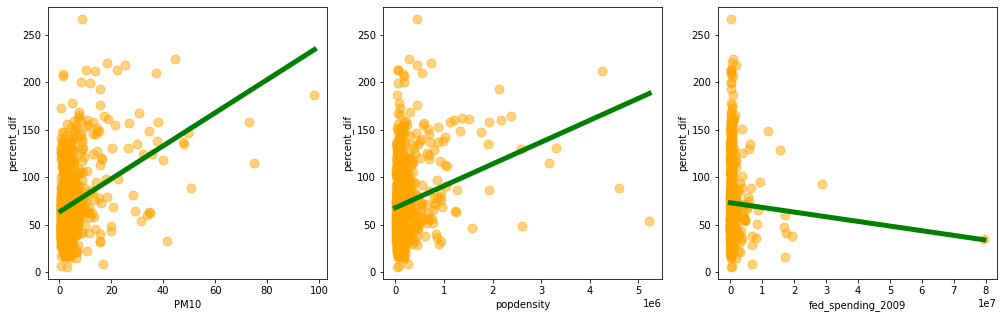

In [719]:
fig, axes = plt.subplots(1,3,figsize=(17,5))
f = sns.regplot(y='percent_dif', x="PM10", data=d, ci=None, 
               scatter_kws={"s": 80,'alpha':0.5,'color':'orange'},
               line_kws={'color': 'green','linewidth':5},ax=axes[0]).set(
                xlabel='PM10', ylabel = "percent_dif")

g = sns.regplot(y='percent_dif', x="popdensity", data=d, ci=None, 
               scatter_kws={"s": 80,'alpha':0.5,'color':'orange'},
               line_kws={'color': 'green','linewidth':5},ax=axes[1]).set(
                xlabel='popdensity', ylabel = "percent_dif")

h = sns.regplot(y='percent_dif', x="fed_spending_2009", data=d,  ci=None, 
               scatter_kws={"s": 80,'alpha':0.5,'color':'orange'},
               line_kws={'color': 'green','linewidth':5},ax=axes[2]).set(
                xlabel='fed_spending_2009', ylabel = "percent_dif")

# i = sns.regplot(y='percent_dif', x="smoking_ban_2010", data=d, ci=None, 
#                scatter_kws={"s": 80,'alpha':0.5,'color':'orange'},
#                line_kws={'color': 'green','linewidth':5},ax=axes[3]).set(
#                 xlabel='smoking_ban_2010', ylabel = "percent_dif")


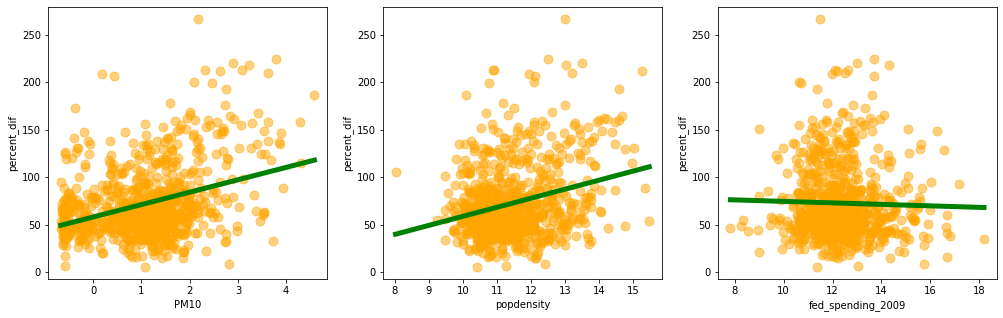

In [720]:
fig, axes = plt.subplots(1,3,figsize=(17,5))
f = sns.regplot(y='percent_dif', x=np.log(d['PM10']), data=d, ci=None, 
               scatter_kws={"s": 80,'alpha':0.5,'color':'orange'},
               line_kws={'color': 'green','linewidth':5},ax=axes[0]).set(
                xlabel='log PM10', ylabel = "percent_dif")

g = sns.regplot(y='percent_dif', x=np.log(d['popdensity']), data=d, ci=None, 
               scatter_kws={"s": 80,'alpha':0.5,'color':'orange'},
               line_kws={'color': 'green','linewidth':5},ax=axes[1]).set(
                xlabel='log popdensity', ylabel = "percent_dif")

h = sns.regplot(y='percent_dif', x=np.log(d['fed_spending_2009']), data=d,  ci=None, 
               scatter_kws={"s": 80,'alpha':0.5,'color':'orange'},
               line_kws={'color': 'green','linewidth':5},ax=axes[2]).set(
                xlabel='log fed_spending_2009', ylabel = "percent_dif")


In [721]:
lm3 = smf.ols(formula = 'percent_dif~avgnovtemp', data = d).fit()
lm3.summary()
print(reset_ramsey(lm3,degree=2))
print(reset_ramsey(lm3,degree=3))
print(reset_ramsey(lm3,degree=4))



<F test: F=array([[1.08607983]]), p=0.29765507888985826, df_denom=803, df_num=1>
<F test: F=array([[3.46990311]]), p=0.031588049631286946, df_denom=802, df_num=2>
<F test: F=array([[2.73929755]]), p=0.042413124264493014, df_denom=801, df_num=3>


In [722]:
lm3 = smf.ols(formula = 'percent_dif~number_disasters', data = d).fit()
lm3.summary()
print(reset_ramsey(lm3,degree=2))
print(reset_ramsey(lm3,degree=3))
print(reset_ramsey(lm3,degree=4))



<F test: F=array([[10.95746282]]), p=0.0009738642849374322, df_denom=803, df_num=1>
<F test: F=array([[6.91960036]]), p=0.0010483093448059272, df_denom=802, df_num=2>
<F test: F=array([[4.61208559]]), p=0.0033018423228859005, df_denom=801, df_num=3>


In [723]:
from statsmodels.compat.pandas import Appender
from statsmodels.compat.python import lzip

from collections import defaultdict

import numpy as np

from statsmodels.graphics._regressionplots_doc import _plot_influence_doc
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.multitest import multipletests
from statsmodels.tools.decorators import cache_readonly
from statsmodels.tools.tools import maybe_unwrap_results

# outliers test convenience wrapper

def outlier_test(model_results, method='bonf', alpha=.05, labels=None,
                 order=False, cutoff=None):
    from scipy import stats  # lazy import
    if labels is None:
        labels = getattr(model_results.model.data, 'row_labels', None)
    infl = getattr(model_results, 'get_influence', None)
    if infl is None:
        results = maybe_unwrap_results(model_results)
        raise AttributeError("model_results object %s does not have a "
                             "get_influence "
                             "method." % results.__class__.__name__)
    resid = infl().resid_studentized_external
    if order:
        idx = np.abs(resid).argsort()[::-1]
        resid = resid[idx]
        if labels is not None:
            labels = np.asarray(labels)[idx]
    df = model_results.df_resid - 1
    unadj_p = stats.t.sf(np.abs(resid), df) * 2
    adj_p = multipletests(unadj_p, alpha=alpha, method=method)

    data = np.c_[resid, unadj_p, adj_p[1]]
    if cutoff is not None:
        mask = data[:, -1] < cutoff
        data = data[mask]
    else:
        mask = slice(None)

    if labels is not None:
        from pandas import DataFrame
        return DataFrame(data,
                         columns=['student_resid', 'unadj_p', method + "(p)"],
                         index=np.asarray(labels)[mask])
    return data


# influence measures

def reset_ramsey(res, degree=5):
    order = degree + 1
    k_vars = res.model.exog.shape[1]
    # vander without constant and x, and drop constant
    norm_values = np.asarray(res.fittedvalues)
    norm_values = norm_values / np.sqrt((norm_values ** 2).mean())
    y_fitted_vander = np.vander(norm_values, order)[:, :-2]
    exog = np.column_stack((res.model.exog, y_fitted_vander))
    exog /= np.sqrt((exog ** 2).mean(0))
    endog = res.model.endog / (res.model.endog ** 2).mean()
    res_aux = OLS(endog, exog).fit()
    # r_matrix = np.eye(degree, exog.shape[1], k_vars)
    r_matrix = np.eye(degree - 1, exog.shape[1], k_vars)
    # df1 = degree - 1
    # df2 = exog.shape[0] - degree - res.df_model  (without constant)
    return res_aux.f_test(r_matrix)  # , r_matrix, res_a

In [736]:
d['logfedspending_2019']=np.log(d['fed_spending_2009'])
d['logpopdensity']=np.log(d['popdensity'])
d['logPM10']=np.log(d['PM10'])
d['number_disasterssecond'] = d['number_disasters'].apply(lambda number_disasters: number_disasters*number_disasters)
d['avgnovtempthird'] = d['avgnovtemp'].apply(lambda avgnovtemp: avgnovtemp*avgnovtemp*avgnovtemp)
d['avgnovtempsecond'] = d['avgnovtemp'].apply(lambda avgnovtemp: avgnovtemp*avgnovtemp)

                    
                                
lm6 = smf.ols(formula = 'percent_dif~number_disasters+number_disasterssecond+loggeneration2019+avgnovtemp+avgnovtempsecond+percapitaincome2019+logPM10+logpopdensity+logfedspending_2019+smoking_ban_2010', data = d).fit(cov_type='HC3')
print (lm6.summary())




                            OLS Regression Results                            
Dep. Variable:            percent_dif   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     24.36
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           2.36e-40
Time:                        15:55:06   Log-Likelihood:                -3946.9
No. Observations:                 806   AIC:                             7916.
Df Residuals:                     795   BIC:                             7967.
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

[Text(0.5, 0, 'Fitted'), Text(0, 0.5, 'Residuals')]

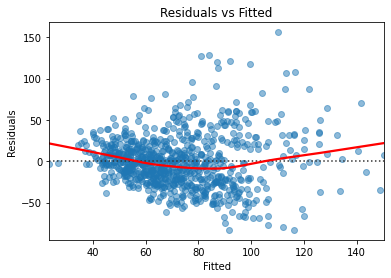

In [725]:
fig, ax = plt.subplots(1, 1)
sns.residplot(lm6.predict(), d['percent_dif'], lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted', ylabel='Residuals')


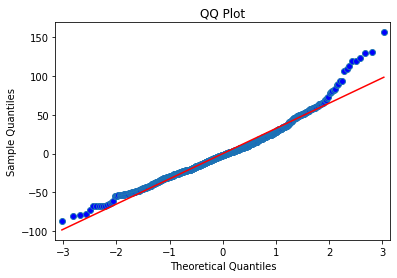

In [780]:
fig, ax = plt.subplots(1, 1)
sm.ProbPlot(lm6.resid).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

In [771]:
lm7 = smf.ols(formula = 'percent_dif~number_disasters+number_disasterssecond+loggeneration2019+avgnovtemp+percapitaincome2019+logPM10+logpopdensity', data = d).fit(cov_type='HC3')
print (lm7.summary())
d['area']=np.log(d['area_2010'])

                            OLS Regression Results                            
Dep. Variable:            percent_dif   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     34.55
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           3.45e-42
Time:                        17:15:11   Log-Likelihood:                -3948.7
No. Observations:                 806   AIC:                             7913.
Df Residuals:                     798   BIC:                             7951.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -9

[Text(0.5, 0, 'Fitted'), Text(0, 0.5, 'Residuals')]

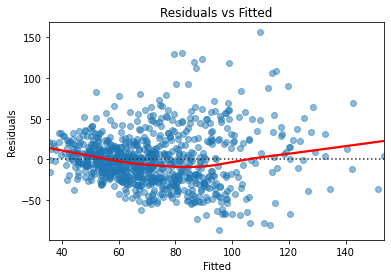

In [772]:

fig, ax = plt.subplots(1, 1)
sns.residplot(lm7.predict(), d['percent_dif'], lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted', ylabel='Residuals')


In [779]:
datam=d.loc[:,d.columns!='logpercent_dif']
datam=datam.loc[:,datam.columns!='percent_dif']
datam=datam.loc[:,datam.columns!='smoking_ban_2010']
datam=datam.loc[:,datam.columns!='fed_spending_2009']
datam=datam.loc[:,datam.columns!='unemployment_rate_2011']
datam=datam.loc[:,datam.columns!='area_2010']
datam=datam.loc[:,datam.columns!='logfedspending_2019']
datam=datam.loc[:,datam.columns!='avgnovtempthird']
datam=datam.loc[:,datam.columns!='avgnovtempsecond']
datam=datam.loc[:,datam.columns!='PM10']
datam=datam.loc[:,datam.columns!='popdensity']
datam=datam.loc[:,datam.columns!='area']
datam=datam.loc[:,datam.columns!='popdensity']


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(datam.to_numpy(), i) for i in range(datam.to_numpy().shape[1])]
vif = vif.T
dfi.export(vif,"vif.png")
vif

[1214/172031.628024:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/2g/x52yhs_s6h96x64ydv7ck14m0000gn/T/: Operation not permitted (1)
[1214/172031.631154:ERROR:file_io.cc(94)] ReadExactly: expected 8, observed 0
[1214/172031.633612:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/2g/x52yhs_s6h96x64ydv7ck14m0000gn/T/: Operation not permitted (1)
[1214/172033.207154:INFO:headless_shell.cc(653)] Written to file /var/folders/2g/x52yhs_s6h96x64ydv7ck14m0000gn/T/tmpbize7l9d/temp.png.


,0,1,2,3,4,5,6
VIF_Factor,19.93442,1.976246,5.181278,24.082985,39.264019,2.568261,12.852671


In [778]:
fig, ax = plt.subplots(1, 1)
sm.ProbPlot(lm7.resid).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

,number_disasters,avgnovtemp,loggeneration2019,percapitaincome2019,logpopdensity,logPM10,number_disasterssecond
0,113.0,9.222292,2.846063,34173.0,14.771309,1.247032,12769.0
1,0.0,21.313125,4.831030,41514.0,14.967405,4.318687,0.0
2,19.0,-2.059167,2.714099,37552.0,15.468720,3.452841,361.0
3,36.0,9.998125,2.846063,32653.0,14.765836,2.166765,1296.0
4,154.0,8.522917,3.649047,27924.0,14.270097,0.231112,23716.0
...,...,...,...,...,...,...,...
888,43.0,19.393542,2.846063,20169.0,9.572828,0.970779,1849.0
890,22.0,7.670000,6.956924,20084.0,9.469932,1.163151,484.0
891,0.0,-1.071875,2.846063,29100.0,9.477309,1.075002,0.0
893,26.0,8.133750,7.461957,23696.0,9.465448,0.385262,676.0
